In [1]:
#create a sine wave, its audio file, and calculate the frequency

import numpy as np
import wave
import struct
import matplotlib.pyplot as plt

# frequency is the number of times a wave repeats a second
frequency = 1000

num_samples = 48000


# The sampling rate of the analog to digital convert

sampling_rate = 48000.0
amplitude = 16000

file = "test.wav"

In [2]:
sine_wave = [np.sin(2 * np.pi * frequency * x/sampling_rate) for x in range(num_samples)]

In [3]:
nframes=num_samples
 
comptype="NONE"
 
compname="not compressed"
 
nchannels=1
 
sampwidth=2

In [4]:
# write the sine wave to a file

In [5]:
wav_file=wave.open(file, 'w')
 
wav_file.setparams((nchannels, sampwidth, int(sampling_rate), nframes, comptype, compname))



In [6]:
# open the file and set the parameters
for s in sine_wave:
   wav_file.writeframes(struct.pack('h', int(s*amplitude)))

In [9]:
frame_rate = 48000.0
 
infile = "test.wav"
 
num_samples = 48000
 
wav_file = wave.open(infile, 'r')

#readframes() reads all the audio frames from a wave file
data = wav_file.readframes(num_samples)
 
wav_file.close()

# reverting the packing of data that made it readable in binary format
data = struct.unpack('{n}h'.format(n=num_samples), data)

data = np.array(data)
	
data_fft = np.fft.fft(data)

# sample print
# data_fft[:8]

# use numpy to convert complex numbers to real values
frequencies = np.abs(data_fft)
 

In [10]:
#find the array element with the highest value
print("The frequency is {} Hz".format(np.argmax(frequencies)))

The frequency is 1000 Hz


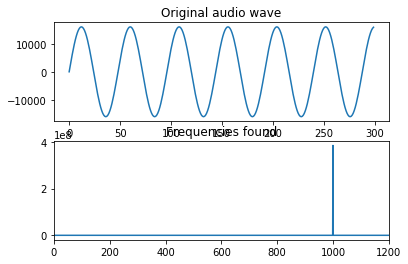

In [11]:
#plot the data

plt.subplot(2,1,1)
 
plt.plot(data[:300])
 
plt.title("Original audio wave")
 
plt.subplot(2,1,2)
 
plt.plot(frequencies)
 
plt.title("Frequencies found")
 
plt.xlim(0,1200)
 
plt.show()

In [17]:

# frequency is the number of times a wave repeats a second
 
frequency = 1000
 
noisy_freq = 50
 
num_samples = 48000
 
# The sampling rate of the analog to digital convert
sampling_rate = 48000.0

#Create the sine wave and noise
 
sine_wave = [np.sin(2 * np.pi * frequency * x1 / sampling_rate) for x1 in range(num_samples)]
 
sine_noise = [np.sin(2 * np.pi * noisy_freq * x1/  sampling_rate) for x1 in range(num_samples)]
 
#Convert them to numpy arrays
 
sine_wave = np.array(sine_wave)
 
sine_noise = np.array(sine_noise)


# Add them to create a noisy signal
 
combined_signal = sine_wave + sine_noise
 

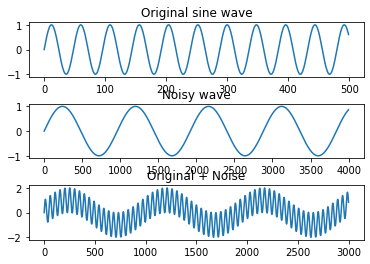

In [18]:
plt.subplot(3,1,1)
 
plt.title("Original sine wave")
 
# Need to add empty space, else everything looks scrunched up!
 
plt.subplots_adjust(hspace=.5)
 
plt.plot(sine_wave[:500])
 
plt.subplot(3,1,2)
 
plt.title("Noisy wave")
 
plt.plot(sine_noise[:4000])
 
plt.subplot(3,1,3)
 
plt.title("Original + Noise")
 
plt.plot(combined_signal[:3000])
 
plt.show()

(0, 1200)

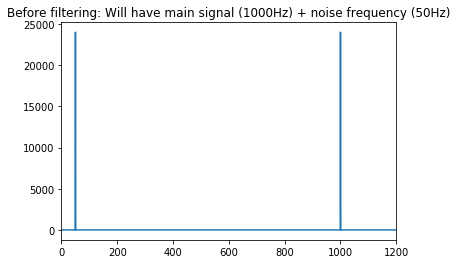

In [20]:
data_fft = np.fft.fft(combined_signal)
 
freq = (np.abs(data_fft[:len(data_fft)]))

plt.plot(freq)
 
plt.title("Before filtering: Will have main signal (1000Hz) + noise frequency (50Hz)")
 
plt.xlim(0,1200)

In [27]:
filtered_freq = [f if (950 < index < 1050 and f > 1) else 0 for index, f in enumerate(freq)]

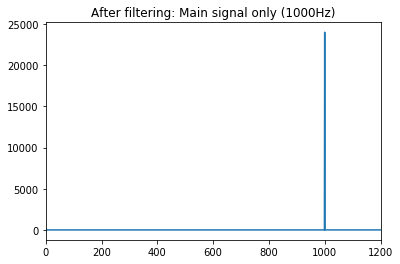

In [28]:
plt.plot(filtered_freq)
 
plt.title("After filtering: Main signal only (1000Hz)")
 
plt.xlim(0,1200)
 
plt.show()
 
plt.close()

In [30]:
#Inverse Fast Fourier Transform

recovered_signal = np.fft.ifft(filtered_freq)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


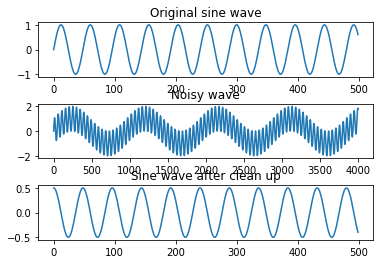

In [31]:
plt.subplot(3,1,1)
 
plt.title("Original sine wave")
 
# Need to add empty space, else everything looks scrunched up!
 
plt.subplots_adjust(hspace=.5)
 
plt.plot(sine_wave[:500])
 
plt.subplot(3,1,2)
 
plt.title("Noisy wave")
 
plt.plot(combined_signal[:4000])
 
plt.subplot(3,1,3)
 
plt.title("Sine wave after clean up")
 
plt.plot((recovered_signal[:500]))
 
plt.show()